In [1]:
from math import trunc
import unittest
import numpy as np
import scipy.sparse as sp
from qiskit.algorithms.evolvers.classical_real_evolver import ClassicalRealEvolver
from test.python.algorithms import QiskitAlgorithmsTestCase
from ddt import data, ddt, unpack
from numpy.testing import assert_raises

from qiskit.quantum_info import Statevector
from qiskit.algorithms.evolvers.evolution_problem import EvolutionProblem
from qiskit.circuit import Parameter
from qiskit.opflow import Y, Z, I, One, X, Zero, VectorStateFn, StateFn, SummedOp, PauliSumOp
from scipy.sparse.linalg import bicg,norm
import matplotlib.pyplot as plt
import time

In [2]:
def create_hamiltonian(num_sites):
    J = 0.1
    g = -1.0

    zz = ["I" * i + "ZZ" + "I" * (num_sites - i - 2) for i in range(num_sites - 1)]
    x = ["I" * i + "X" + "I" * (num_sites - i - 1) for i in range(num_sites)]
    return PauliSumOp.from_list(list(zip(zz, len(zz) * [J])) + list(zip(x, len(x) * [g])))


In [3]:

def time_step(num_sites):
    initial_state = np.zeros(2 ** num_sites, dtype=np.complex128)
    initial_state[0] = 1.0
    initial_state = VectorStateFn(initial_state)

    evolution_problem = EvolutionProblem(create_hamiltonian(num_sites),1.0,initial_state,truncation_threshold=1e-5)
    classic_evolver = ClassicalRealEvolver(timesteps=10)
    a = time.time()
    state, lhs_operator, rhs_operator = classic_evolver._start(evolution_problem=evolution_problem)
    b = time.time()
    classic_evolver._step(state, lhs_operator, rhs_operator)
    c = time.time()
    return b-a, c-b


In [57]:
list_timesteps = np.arange(10,23)
aa = [time_step(i) for i in list_timesteps]
bb = list(zip(*aa))
init_time = np.array(list(bb[0]))
step_time = np.array(list(bb[1]))

0.31340776346141164 -4.963164512267322 0.9977834468489748 1.0532586211614587e-10 0.007389954118641478
For 22 qubits it would take 1.42447566211969 minutes to initialize.
0.39716062611877284 -6.901167228301791 0.9843620384683859 2.567588362676985e-07 0.025128517163120975
For 22 qubits it would take 1.143445042545308 minutes to make a step.


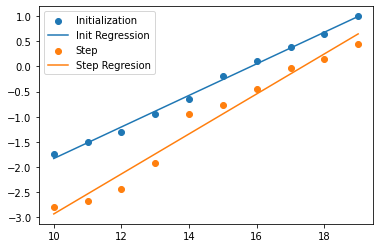

In [55]:
from scipy.stats import linregress

ext_qubits = 25


slope_A, intercept_A, r_value, p_value, std_err = linregress(list_timesteps, np.log10(init_time))
print(slope_A, intercept_A, r_value, p_value, std_err)


time_A = 10**(intercept_A + ext_qubits * slope_A)
print(f"For {ext_qubits} qubits it would take {time.strftime('%H:%M:%S', time.gmtime(time_A)) } to initialize.")

slope_B, intercept_B, r_value, p_value, std_err = linregress(list_timesteps, np.log10(step_time))
print(slope_B, intercept_B, r_value, p_value, std_err)

time_B = 10**(intercept_B + ext_qubits * slope_B)
print(f"For {ext_qubits} qubits it would take {time.strftime('%H:%M:%S', time.gmtime(time_B))} to make a step.")


plt.scatter(list_timesteps,np.log10(init_time))
plt.plot(list_timesteps,intercept_A + list_timesteps*slope_A)
plt.scatter(list_timesteps,np.log10(step_time))
plt.plot(list_timesteps,intercept_B + list_timesteps*slope_B)
plt.legend(['Initialization','Init Regression','Step','Step Regresion'])

In [56]:
print(time_step(22))

(114.64363718032837, 19.180646896362305)
